In [2]:
%load_ext autoreload
import sys
sys.path.append("..")

In [3]:
%autoreload

import numpy as np
import pickle

import main


import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc_file('matplotlibrc')

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]


import darkhistory.physics as phys
import darkhistory.utilities as utils
import darkhistory.spec.transferfunction as tf
import darkhistory.spec.spectools as spectools

from darkhistory.spec.spectrum import Spectrum

from darkhistory.electrons.ics.ics_spectrum import ics_spec
from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec
from darkhistory.electrons.elec_cooling import get_elec_cooling_tf_fast

from darkhistory.electrons import positronium

from scipy.interpolate import interp1d


In [117]:
test = positronium.weighted_photon_spec(photeng)
print(test.toteng()/phys.me)

2.000000000081069


# Marching Up Algorithm

In [3]:
ics_thomson_ref_tf, ics_rel_ref_tf, engloss_ref_tf = main.load_ics_data()


********* Thomson regime scattered photon spectrum *********
Initializing...
Computing spectra by an expansion in beta...
----> Computation by expansion in beta complete!
Computing spectra by analytic series...
*** Computing series 1/12...
*** Computing series 2/12...
*** Computing series 3/12...
*** Computing series 4/12...
*** Computing series 5/12...
*** Computing series 6/12...
*** Computing series 7/12...
*** Computing series 8/12...
*** Computing series 9/12...
*** Computing series 10/12...
*** Computing series 11/12...
*** Computing series 12/12...
----> Computation by analytic series complete!
Spectrum computed!
********* Relativistic regime scattered photon spectrum *********
Initializing...
Computing series 1/4...
Computing series 2/4...
Computing series 3/4...
Computing series 4/4...
Relativistic Computation Complete!
********* Thomson regime energy loss spectrum *********
Computing nonrelativistic energy loss spectrum...
Computing energy loss spectrum by beta expansion...
C

In [252]:
# pickle.dump(ics_thomson_ref_tf, open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_thomson_ref_tf.raw", "wb"))
# pickle.dump(ics_rel_ref_tf, open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_rel_ref_tf.raw", "wb"))
# pickle.dump(engloss_ref_tf, open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/engloss_ref_tf.raw", "wb"))

In [4]:
ics_thomson_ref_tf=pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_thomson_ref_tf.raw", "rb")) 
ics_rel_ref_tf=pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_rel_ref_tf.raw", "rb"))
engloss_ref_tf=pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/engloss_ref_tf.raw", "rb"))

In [5]:
eleceng = 10**np.arange(0, np.log10(5e12), 0.0254)
photeng = 10**np.arange(-4, np.log10(5e12), 0.0334)


rs = 600
xe = 1e-2

b_ne = get_elec_cooling_tf_fast(
    ics_thomson_ref_tf, ics_rel_ref_tf, engloss_ref_tf,
    eleceng, photeng, rs, xe, xHe=0, check_conservation_eng=True, verbose=True
)

***************************************************
rs:  600
injected energy:  3018.5613014197993
Energy in low energy electrons:  2901.5033866429544
Energy in photons:  2672.465405639954
Continuum_engloss:  2630.8410816593823
Energy in photons - Continuum:  41.62432398057172
Deposited in ionization:  40.13101763419823
Deposited in excitation:  27.849077070964242
Deposited in heating:  7.512255692570628
Energy is conserved up to (%):  -0.0019466095133564652
Deposited in ICS:  -0.058759601460041236
Energy conservation with deposited (%):  3.5350055804430864e-15
***************************************************
***************************************************
rs:  600
injected energy:  3200.368594586517
Energy in low energy electrons:  2963.5165441332792
Energy in photons:  5388.308057390493
Continuum_engloss:  5301.769888667906
Energy in photons - Continuum:  86.5381687225863
Deposited in ionization:  79.94052164842176
Deposited in excitation:  55.56557386696665
Deposited in heatin

***************************************************
rs:  600
injected energy:  26278.46540838493
Energy in low energy electrons:  6881.915993894274
Energy in photons:  238136.34244724968
Continuum_engloss:  222688.89220642933
Energy in photons - Continuum:  15447.450240820355
Deposited in ionization:  2070.4879579789567
Deposited in excitation:  1520.7676535864023
Deposited in heating:  362.70876912902463
Energy is conserved up to (%):  -0.018514045430315106
Deposited in ICS:  -4.865207024138103
Energy conservation with deposited (%):  1.5250657156304675e-13
***************************************************
***************************************************
rs:  600
injected energy:  27861.211686297665
Energy in low energy electrons:  6998.818589798662
Energy in photons:  248662.5777684732
Continuum_engloss:  231858.6717497254
Energy in photons - Continuum:  16803.906018747773
Deposited in ionization:  2127.007859219862
Deposited in excitation:  1564.1668071452036
Deposited in heati

Energy in photons - Continuum:  226031.86552355497
Deposited in ionization:  3472.311149404388
Deposited in excitation:  2628.671823746338
Deposited in heating:  624.1840401896224
Energy is conserved up to (%):  -0.005274457764105613
Deposited in ICS:  -12.79315963156211
Energy conservation with deposited (%):  -1.6547814203170869e-13
***************************************************
***************************************************
rs:  600
injected energy:  257157.97663727368
Energy in low energy electrons:  9840.25278457476
Energy in photons:  835909.8684441817
Continuum_engloss:  595339.1223674612
Energy in photons - Continuum:  240570.74607672053
Deposited in ionization:  3489.101263463242
Deposited in excitation:  2642.4665094088564
Deposited in heating:  628.3935337828758
Energy is conserved up to (%):  -0.005048853955985653
Deposited in ICS:  -12.983530676100173
Energy conservation with deposited (%):  -1.8800960617393674e-13
************************************************

Energy conservation with deposited (%):  -3.846009920925816e-14
***************************************************
***************************************************
rs:  600
injected energy:  2373558.8276908966
Energy in low energy electrons:  10341.372126971517
Energy in photons:  3181430.880234928
Continuum_engloss:  825489.2251104041
Energy in photons - Continuum:  2355941.6551245237
Deposited in ionization:  3727.963186882719
Deposited in excitation:  2841.968420102652
Deposited in heating:  723.8758169655331
Energy is conserved up to (%):  -0.0007586491785793476
Deposited in ICS:  -18.00698454843909
Energy conservation with deposited (%):  -3.941296490514194e-14
***************************************************
***************************************************
rs:  600
injected energy:  2516517.76161464
Energy in low energy electrons:  10343.38328507404
Energy in photons:  3327534.000857993
Continuum_engloss:  828638.3314927177
Energy in photons - Continuum:  2498895.669365

Energy in photons:  22762546.82752621
Continuum_engloss:  872361.385400255
Energy in photons - Continuum:  21890185.442125957
Deposited in ionization:  3737.770055190843
Deposited in excitation:  2850.5023173440727
Deposited in heating:  745.5345514860621
Energy is conserved up to (%):  -8.687446535891909e-05
Deposited in ICS:  -19.03233813083704
Energy conservation with deposited (%):  -1.0733096418082027e-14
***************************************************
***************************************************
rs:  600
injected energy:  23227367.96357105
Energy in low energy electrons:  10361.991532139335
Energy in photons:  24082052.46880964
Continuum_engloss:  872361.48402756
Energy in photons - Continuum:  23209690.984782077
Deposited in ionization:  3737.787491506767
Deposited in excitation:  2850.517899228792
Deposited in heating:  745.7142057727075
Energy is conserved up to (%):  -8.19392869036867e-05
Deposited in ICS:  -19.032339684176037
Energy conservation with deposited (%)

Energy is conserved up to (%):  -9.41252025151142e-06
Deposited in ICS:  -19.032942003683914
Energy conservation with deposited (%):  1.3548871563870004e-14
***************************************************
***************************************************
rs:  600
injected energy:  214387766.59735024
Energy in low energy electrons:  10362.295411662286
Energy in photons:  215242448.57289782
Continuum_engloss:  872362.2948256644
Energy in photons - Continuum:  214370086.27807215
Deposited in ionization:  3737.9322946307334
Deposited in excitation:  2850.64818287893
Deposited in heating:  748.4763059028784
Energy is conserved up to (%):  -8.8777999321503e-06
Deposited in ICS:  -19.032916999398726
Energy conservation with deposited (%):  8.772074372561752e-16
***************************************************
***************************************************
rs:  600
injected energy:  227300295.32909778
Energy in low energy electrons:  10362.295857511803
Energy in photons:  2281549

***************************************************
rs:  600
injected energy:  1314014023.0390344
Energy in low energy electrons:  10362.299435199471
Energy in photons:  1314868704.715023
Continuum_engloss:  872362.3049227571
Energy in photons - Continuum:  1313996342.4101002
Deposited in ionization:  3737.9342130735226
Deposited in excitation:  2850.6499533190176
Deposited in heating:  748.7786522655679
Energy is conserved up to (%):  -1.448486798323296e-06
Deposited in ICS:  -19.03331999416448
Energy conservation with deposited (%):  2.6052022826612953e-14
***************************************************
***************************************************
rs:  600
injected energy:  1393156802.9453034
Energy in low energy electrons:  10362.299448332891
Energy in photons:  1394011484.6178427
Continuum_engloss:  872362.304955798
Energy in photons - Continuum:  1393139122.312887
Deposited in ionization:  3737.9342193359394
Deposited in excitation:  2850.6499591748416
Deposited in heat

***************************************************
rs:  600
injected energy:  6373823014.383458
Energy in low energy electrons:  10362.299552411689
Energy in photons:  6374677696.00967
Continuum_engloss:  872362.3052178675
Energy in photons - Continuum:  6373805333.7044525
Deposited in ionization:  3737.934268964665
Deposited in excitation:  2850.6500057653607
Deposited in heating:  748.8287471773846
Energy is conserved up to (%):  -2.9862090938830825e-07
Deposited in ICS:  -19.033568049846778
Energy conservation with deposited (%):  -3.1144006386006386e-15
***************************************************
***************************************************
rs:  600
injected energy:  6757716993.552843
Energy in low energy electrons:  10362.299553047556
Energy in photons:  6758571675.178373
Continuum_engloss:  872362.3052194712
Energy in photons - Continuum:  6757699312.873154
Deposited in ionization:  3737.9342692678824
Deposited in excitation:  2850.6500060525923
Deposited in heati

***************************************************
rs:  600
injected energy:  46558609352.295815
Energy in low energy electrons:  10362.299558394448
Energy in photons:  46559464033.909225
Continuum_engloss:  872362.305232967
Energy in photons - Continuum:  46558591671.604
Deposited in ionization:  3737.934271817622
Deposited in excitation:  2850.650008477162
Deposited in heating:  748.8418898907852
Energy is conserved up to (%):  -4.088161729899385e-08
Deposited in ICS:  -19.033887822340493
Energy conservation with deposited (%):  -5.299298880427796e-14
***************************************************
***************************************************
rs:  600
injected energy:  49362824305.94475
Energy in low energy electrons:  10362.299558410883
Energy in photons:  49363678987.55803
Continuum_engloss:  872362.3052330089
Energy in photons - Continuum:  49362806625.25279
Deposited in ionization:  3737.9342718254597
Deposited in excitation:  2850.6500084846934
Deposited in heating: 

***************************************************
rs:  600
injected energy:  429734281153.67926
Energy in low energy electrons:  10362.299558563345
Energy in photons:  429735135835.29047
Continuum_engloss:  872362.3052333947
Energy in photons - Continuum:  429734263472.9852
Deposited in ionization:  3737.9342718981675
Deposited in excitation:  2850.650008554845
Deposited in heating:  748.8452743436402
Energy is conserved up to (%):  -4.429501069988352e-09
Deposited in ICS:  -19.03507120151514
Energy conservation with deposited (%):  -3.1136203043863607e-15
***************************************************
***************************************************
rs:  600
injected energy:  455617083799.0161
Energy in low energy electrons:  10362.29955856376
Energy in photons:  455617938480.6273
Continuum_engloss:  872362.3052333959
Energy in photons - Continuum:  455617066118.3221
Deposited in ionization:  3737.9342718983644
Deposited in excitation:  2850.650008555038
Deposited in heating

***************************************************
rs:  600
injected energy:  3139062769137.661
Energy in low energy electrons:  10362.299558567749
Energy in photons:  3139067395498.42
Continuum_engloss:  872362.3052334061
Energy in photons - Continuum:  3139066523136.1147
Deposited in ionization:  3737.934271900268
Deposited in excitation:  2850.650008556911
Deposited in heating:  748.8471651224143
Energy is conserved up to (%):  -0.00012015364017112022
Deposited in ICS:  -3771698.183627042
Energy conservation with deposited (%):  -2.3835951772770597e-14
***************************************************
***************************************************
rs:  600
injected energy:  3328127839596.5234
Energy in low energy electrons:  10362.299558567593
Energy in photons:  3328128946989.57
Continuum_engloss:  872362.3052334059
Energy in photons - Continuum:  3328128074627.2646
Deposited in ionization:  3737.934271900192
Deposited in excitation:  2850.6500085568377
Deposited in heating

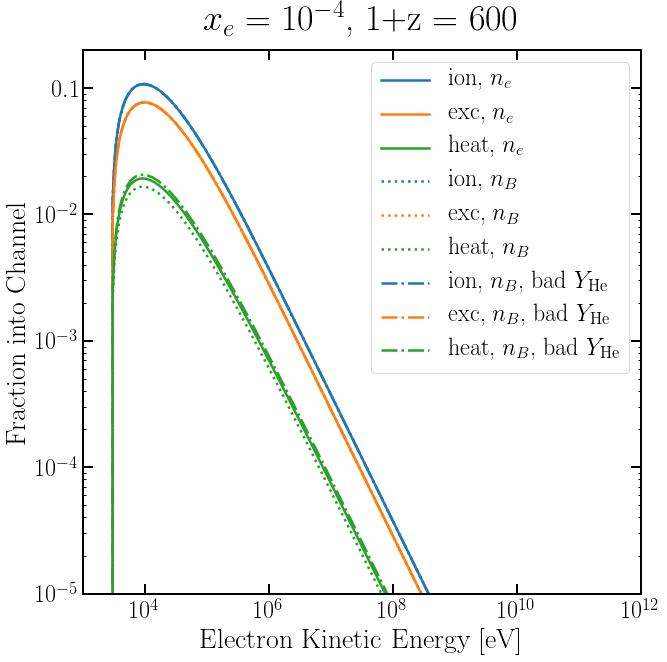

In [25]:
plt.figure()

ax = plt.gca()
ax.loglog()

plt.xlabel('Electron Kinetic Energy [eV]')
plt.ylabel('Fraction into Channel')
plt.title(r'$x_e = 10^{-4}$, 1+z = 600')

plt.axis([1e3, 1e12, 1e-5, 0.2])

plt.plot(eleceng, b_ne[2]/eleceng, label=r'ion, $n_e$', color='C0')
plt.plot(eleceng, b_ne[3]/eleceng, label=r'exc, $n_e$', color='C1')
plt.plot(eleceng, b_ne[4]/eleceng, label=r'heat, $n_e$', color='C2')
plt.plot(eleceng, b_nB[2]/eleceng, label=r'ion, $n_B$', color='C0', linestyle=':')
plt.plot(eleceng, b_nB[3]/eleceng, label=r'exc, $n_B$', color='C1', linestyle=':')
plt.plot(eleceng, b_nB[4]/eleceng, label=r'heat, $n_B$', color='C2', linestyle=':')
plt.plot(eleceng, b_nB_bad_YHe[2]/eleceng, label=r'ion, $n_B$, bad $Y_\mathrm{He}$', color='C0', linestyle='-.')
plt.plot(eleceng, b_nB_bad_YHe[3]/eleceng, label=r'exc, $n_B$, bad $Y_\mathrm{He}$', color='C1', linestyle='-.')
plt.plot(eleceng, b_nB_bad_YHe[4]/eleceng, label=r'heat, $n_B$, bad $Y_\mathrm{He}$', color='C2', linestyle='-.')


plt.legend()

In [26]:
b_nB_bad_YHe[4]/b_ne[4]

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        